# Quantum Teleportation Algorithm

In [63]:
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

## Different steps implemented as functions

In [64]:
def create_bell_pair(qc, a, b):
    """
    Creates an entangled pair of qubits (also called Bell pair)
    """
    qc.h(a)
    qc.cx(a,b)
    qc.barrier()

def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
    qc.barrier()

def measure_and_send(qc, a, b):
    """
    Measures qubits a & b and 'sends' the results to Bob
    """
    qc.measure(a,0)
    qc.measure(b,1)
    qc.barrier()

def bob_gates(qc, qubit, crz, crx):
    """
    Apply gates if the registers are in the state '1'
    """
    qc.x(qubit).c_if(crx, 1) 
    qc.z(qubit).c_if(crz, 1)

## Defining an intial state

<IPython.core.display.Math object>

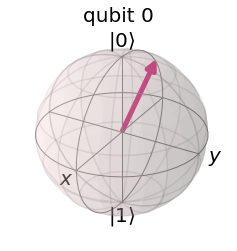

In [65]:
# Create random 1-qubit state
psi = random_state(1)

# Display it nicely
array_to_latex(psi, pretext="|\\psi\\rangle =")

init_gate = Initialize(psi)
init_gate.label = "init"

# Show it on a Bloch sphere
plot_bloch_multivector(psi)

## Creating the quantum circuit

In [66]:
qr = QuantumRegister(3)    # Protocol uses 3 qubits
crz = ClassicalRegister(1) # and 2 classical bits
crx = ClassicalRegister(1) # in 2 different registers

teleportation_circuit = QuantumCircuit(qr, crz, crx)

teleportation_circuit.append(init_gate, [0])
teleportation_circuit.barrier()

## The algorithm

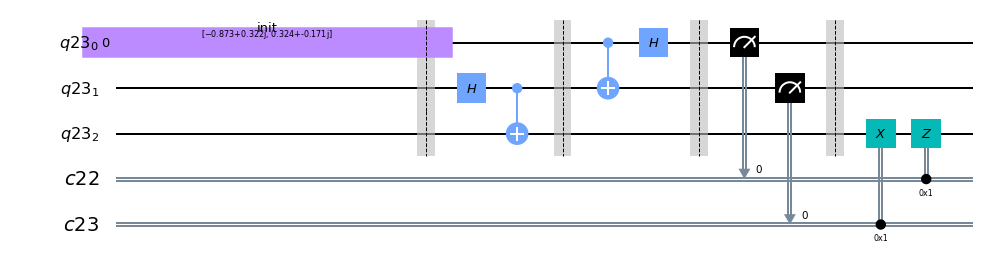

In [67]:
create_bell_pair(teleportation_circuit, 1, 2)

alice_gates(teleportation_circuit, 0, 1)

measure_and_send(teleportation_circuit, 0, 1)

bob_gates(teleportation_circuit, 2, crz, crx)

teleportation_circuit.draw('mpl')

## Checking the output

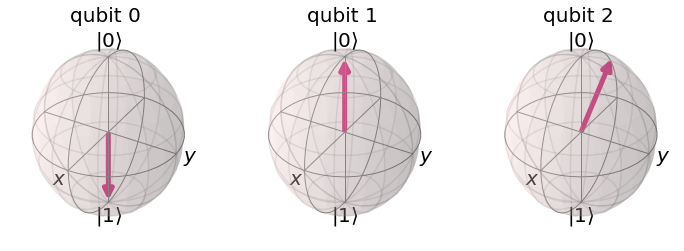

In [69]:
backend = BasicAer.get_backend('statevector_simulator')
out_vector = execute(teleportation_circuit, backend).result().get_statevector()
plot_bloch_multivector(out_vector)